In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('spam.csv', encoding='latin-1')
dataset.shape

(5572, 5)

In [3]:
dataset.columns.to_list()

['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [4]:
dataset.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2099,spam,"SMS SERVICES. for your inclusive text credits,...",NaN,NaN,NaN
814,spam,U were outbid by simonwatson5120 on the Shinco...,NaN,NaN,NaN
3195,ham,"I av a new number, . Wil u only use this one,ta.",NaN,NaN,NaN
3375,ham,"Good afternon, my love. How are today? I hope ...",NaN,NaN,NaN
4518,ham,Just got part Nottingham - 3 hrs 63miles. Good...,NaN,NaN,NaN


In [5]:
# to know more details of information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# check in total how many missing values a dataset has
dataset.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

## Data analysis using pandas

1. data cleaning
2. EDA
3. text preprocessing
4. train test split
5. build your model
6. evaluate the model
7. improvement
8. deploy your application into the cloud

# 1) Data Cleaning

In [7]:
#remove the last 3 columns
dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
dataset.shape

(5572, 2)

In [9]:
dataset.sample(5)

,v1,v2
5439,ham,Hey i've booked the 2 lessons on sun liao...
4332,ham,Y bishan lei... I tot Ì_ say lavender?
81,ham,K. Did you call me just now ah?
1008,ham,"Poyyarikatur,kolathupalayam,unjalur post,erode..."
3657,ham,R u here yet? I'm wearing blue shirt n black p...


In [10]:
# rename the columns v1->target and v2->text
dataset.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [11]:
dataset.sample(5)

,target,text
3117,ham,R u saying i should re order the slippers cos ...
3960,ham,Your dad is back in ph?
2767,ham,Wow v v impressed. Have funs shopping!
3709,ham,ARE YOU IN TOWN? THIS IS V. IMPORTANT
3656,ham,Studying. But i.ll be free next weekend.


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# 2) EDA

In [13]:
# how many categories in target with values
dataset['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [14]:
# convert categorical columns to numerical vector
"""
target -> no by Label encoder, one hot encoder, map function
text>numeric: bow, tfidf, word2vec, skpgram, cbow, sent2vec
"""

'\ntarget -> no by Label encoder, one hot encoder, map function\ntext>numeric: bow, tfidf, word2vec, skpgram, cbow, sent2vec\n'

In [15]:
#using label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['target'] = encoder.fit_transform(dataset['target'])

In [16]:
dataset.sample(5)
# 1 -> spam
# 0 -> ham

,target,text
2526,0,Do u noe how 2 send files between 2 computers?
4341,0,Ha! I wouldn't say that I just didn't read any...
4572,1,\URGENT! This is the 2nd attempt to contact U!...
908,0,WHITE FUDGE OREOS ARE IN STORES
3627,0,Meeting u is my work. . . Tel me when shall i ...


In [17]:
# check for duplicates
dataset.duplicated().sum()

403

In [19]:
dataset = dataset.drop_duplicates(keep='first')
dataset.duplicated().sum()

0

In [20]:
dataset.shape

(5169, 2)

In [21]:
dataset['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

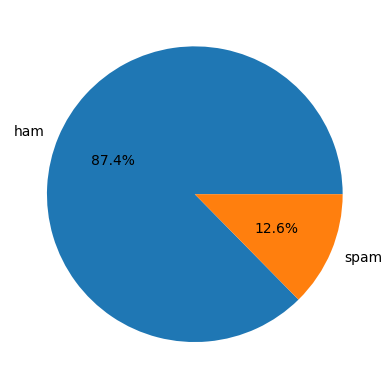

In [22]:
# plot the ratio of ham vs spam
import matplotlib.pyplot as plt
plt.pie(dataset['target'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.show()

In [23]:
import nltk
# nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\evedr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
# find out no. of characters, words and sentences in each message
# plot a pie chart for target(0) and target(1) distribution

# count the no. of characters in each text message
dataset['char_count'] = dataset['text'].apply(len)

In [25]:
dataset.sample()

,target,text,char_count
4476,0,Oh :-)only 4 outside players allowed to play know,49


In [26]:
# calculate the no. of words in each text message
dataset['word_count'] = dataset['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [27]:
dataset.sample()

,target,text,char_count,word_count
564,0,"Fuck babe ... I miss you already, you know ? C...",146,36


In [28]:
# calculate the no. of sentences in each text message
dataset['sentence_count'] = dataset['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [29]:
dataset.sample()

,target,text,char_count,word_count,sentence_count
275,0,Thanx...,8,2,1


In [30]:
# describe the char, word and sentence attributes of the dataset
dataset[['char_count', 'word_count', 'sentence_count']].describe()

,char_count,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# describe the char, word and sentence attributes of the dataset for target 0 i.e. ham
dataset[dataset['target'] == 0][['char_count', 'word_count', 'sentence_count']].describe()

,char_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# describe the char, word and sentence attributes of the dataset for target 1 i.e. spam
dataset[dataset['target'] == 1][['char_count', 'word_count', 'sentence_count']].describe()

,char_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='char_count', ylabel='Count'>

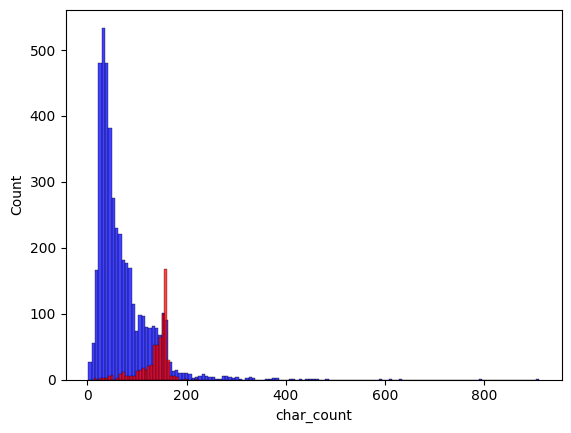

In [33]:
# visualize the distribution of ham and spam messages and their char count
import seaborn as sns
sns.histplot(dataset[dataset['target'] == 0]['char_count'], color='blue') # ham
sns.histplot(dataset[dataset['target'] == 1]['char_count'], color='red') # spam

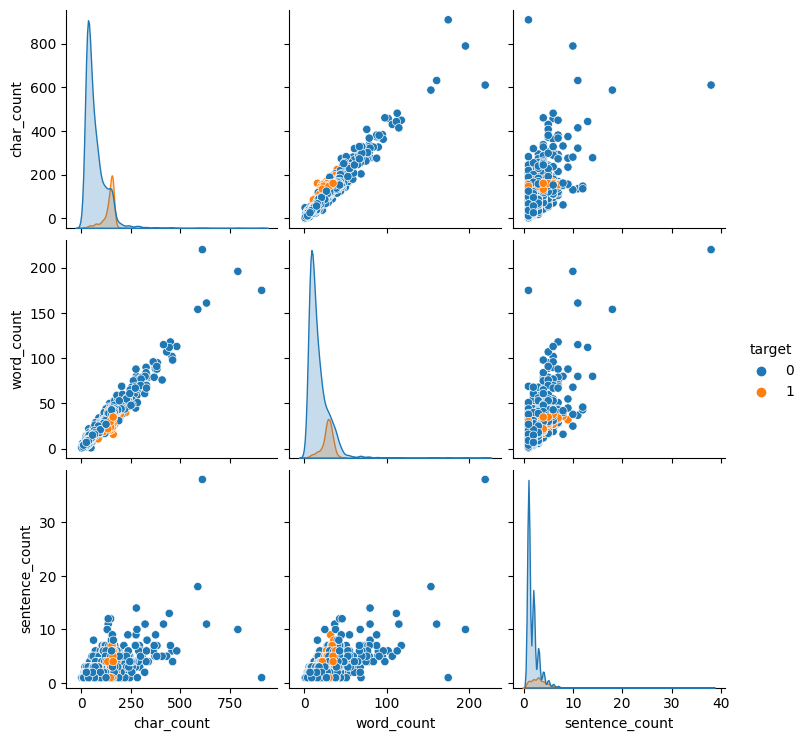

In [35]:
# create a pairplot for the dataset
sns.pairplot(dataset, hue='target')
plt.show()

In [36]:
# correlation
dataset.corr()

C:\Users\evedr\AppData\Local\Temp\ipykernel_15796\1526150918.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,target,char_count,word_count,sentence_count
target,1.000000,0.384717,0.262912,0.263939
char_count,0.384717,1.000000,0.965760,0.624139
word_count,0.262912,0.965760,1.000000,0.679971
sentence_count,0.263939,0.624139,0.679971,1.000000


C:\Users\evedr\AppData\Local\Temp\ipykernel_15796\92175269.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True)


<Axes: >

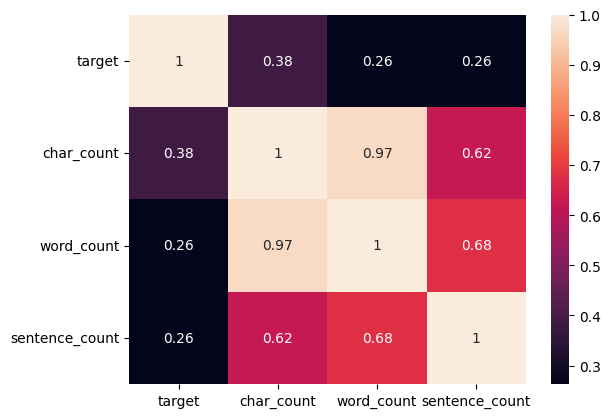

In [39]:
# heatmap
sns.heatmap(dataset.corr(), annot=True)

In [ ]:
# select features with low correlation

# 3. Text preprocessing

a. lower the case

b. break into list of words(tokenization)

c. removal of stop words

d. removal of punctuations symbols and special characters

e. stemming or lemmatization

In [40]:
from nltk.corpus import stopwords
english_stopWords = set(stopwords.words('english'))
len(english_stopWords)

179

In [42]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [45]:
# define a function to preprocess the text
def preprocess(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    corpus = []
    for i in text:
        if i.isalnum():
            corpus.append(i)
    
    text = corpus[:]
    corpus.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            corpus.append(i)
    
    text = corpus[:]
    corpus.clear()

    for i in text:
        corpus.append(ps.stem(i))

    return ' '.join(corpus)
preprocess('Hello students, how are you! !WELcome to ###NLP@@@ claSS!')

'hello student welcom nlp class'

In [46]:
dataset['processed_text'] = dataset['text'].apply(preprocess)
dataset.sample()

,target,text,char_count,word_count,sentence_count,processed_text
21,0,IÛ÷m going to try for 2 months ha ha only joking,49,11,1,go tri 2 month ha ha joke


In [47]:
# convert preprocessed text into numeric vector using bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(dataset['processed_text']).toarray()
X.shape

(5169, 6708)

In [48]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# build a model using naive bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

# predict the test set results and calculate the accuracy, precision, recall and confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

Accuracy:  0.9738878143133463
Precision:  0.8881578947368421
Recall:  0.9310344827586207
Confusion Matrix:  [[872  17]
 [ 10 135]]


In [51]:
# convert preprocessed text into numeric vector using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(dataset['processed_text']).toarray()
X.shape

(5169, 6708)

In [52]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# build a model using naive bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

# predict the test set results and calculate the accuracy, precision, recall and confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

Accuracy:  0.9613152804642167
Precision:  0.9906542056074766
Recall:  0.7310344827586207
Confusion Matrix:  [[888   1]
 [ 39 106]]
